sorting clusters need to check.

finding titles needs acomplete developement.

finding issues of generalization (z.B: pdf start by an image, ...).

In [33]:
import fitz
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import pprint as pp

In [53]:
pdf_address = "li.pdf"
doc = fitz.open(pdf_address)

page = doc.load_page(9)
page_dict = page.get_text("dict")
page_blocks = page_dict["blocks"]
page_blocks_2 = page.get_text("blocks")
page_text = page.get_text("text")

In [54]:
page_dict

{'width': 595.276,
 'height': 841.89,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (113.38600158691406,
    46.6934814453125,
    510.26995849609375,
    62.151676177978516),
   'lines': [{'spans': [{'size': 10.909099578857422,
       'flags': 4,
       'font': 'LMRoman10-Regular',
       'color': 0,
       'ascender': 1.1269999742507935,
       'descender': -0.28999999165534973,
       'text': '1 Introduction',
       'origin': (113.38600158691406, 58.988037109375),
       'bbox': (113.38600158691406,
        46.6934814453125,
        184.05514526367188,
        62.151676177978516)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (113.38600158691406,
      46.6934814453125,
      184.05514526367188,
      62.151676177978516)},
    {'spans': [{'size': 10.909099578857422,
       'flags': 4,
       'font': 'LMRoman10-Regular',
       'color': 0,
       'ascender': 1.1269999742507935,
       'descender': -0.28999999165534973,
       'text': '2',
       'origin': (504.8153991

In [55]:
x_criterion = 20
x_tol = page.get_text("dict")['width']/x_criterion

In [56]:
def find_blocks_clusters(page, x_tol=1, do_plot=False):

    def get_center(bbox, x_tol=1, y_tol=1, x_y_scale=1):
        x0, y0, x1, y1 = bbox
        x0 = (round(x0 / x_tol)) * round(x_tol) * x_y_scale
        x1 = (round(x1 / x_tol)) * round(x_tol) * x_y_scale
        y0 = (round(y0 / y_tol)) * round(y_tol)
        y1 = (round(y1 / y_tol)) * round(y_tol)
        return ((x0 + x1) / 2, (y0 + y1) / 2)

    page_dict = page.get_text("dict")
    page_blocks = page_dict["blocks"]

    if page_blocks:
        center_points = [get_center(block['bbox'], x_tol=x_tol) for block in page_blocks]
        scaled_points = [(x, y) for x, y in [get_center(block['bbox'], x_tol=x_tol, x_y_scale=0.5) for block in page_blocks]]

        clustering = DBSCAN(eps=x_tol+5, min_samples=1).fit(scaled_points)
        labels = clustering.labels_

        for i, block in enumerate(page_blocks):
            block['cluster'] = labels[i]

        if do_plot:

            test = []
            test1 = scaled_points
            for i, block in enumerate(page_blocks):
                block['cluster'] = labels[i]
                test2 = [test1[i][0], test1[i][1], labels[i]]
                test.append(test2)

            x_coords = [point[0] for point in test]
            y_coords = [point[1] for point in test]
            colors = [point[2] for point in test]

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            ax1.scatter(x_coords, y_coords, c=colors)
            ax1.set_xlabel('X Coordinate')
            ax1.set_ylabel('Y Coordinate')
            ax1.set_title('Points with Color Coding')
            ax1.axis('scaled')
            ax1.set_xlim(0, page_dict['width'])
            ax1.set_ylim(0, page_dict['height'])
            ax1.invert_yaxis()

            center_x_coords = [point[0] for point in center_points]
            center_y_coords = [point[1] for point in center_points]

            ax2.scatter(center_x_coords, center_y_coords, c=colors)
            ax2.set_xlabel('X Coordinate')
            ax2.set_ylabel('Y Coordinate')
            ax2.set_title('Center Points')
            ax2.axis('scaled')
            ax2.set_xlim(0, page_dict['width'])
            ax2.set_ylim(0, page_dict['height'])
            ax2.invert_yaxis()

            plt.subplots_adjust(wspace=0.4)
            plt.show()

    return page_blocks

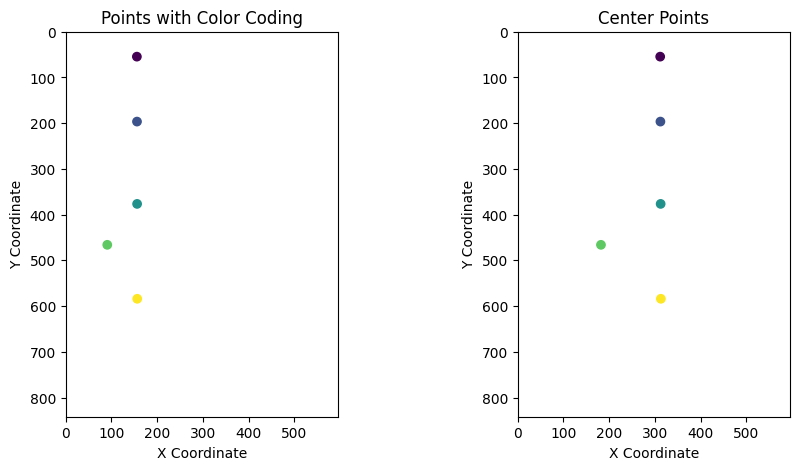

[{'number': 0,
  'type': 0,
  'bbox': (113.38600158691406,
   46.6934814453125,
   510.26995849609375,
   62.151676177978516),
  'lines': [{'spans': [{'size': 10.909099578857422,
      'flags': 4,
      'font': 'LMRoman10-Regular',
      'color': 0,
      'ascender': 1.1269999742507935,
      'descender': -0.28999999165534973,
      'text': '1 Introduction',
      'origin': (113.38600158691406, 58.988037109375),
      'bbox': (113.38600158691406,
       46.6934814453125,
       184.05514526367188,
       62.151676177978516)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (113.38600158691406,
     46.6934814453125,
     184.05514526367188,
     62.151676177978516)},
   {'spans': [{'size': 10.909099578857422,
      'flags': 4,
      'font': 'LMRoman10-Regular',
      'color': 0,
      'ascender': 1.1269999742507935,
      'descender': -0.28999999165534973,
      'text': '2',
      'origin': (504.8153991699219, 58.988037109375),
      'bbox': (504.8153991699219,
       46.6934814453

In [57]:
find_blocks_clusters(page, do_plot=True)

In [5]:
x = [(1, .5), (.5, 1), (2,1), (1,2), (2,3), (1,4), (2,4), (1,5)]
s_x = sorted(x, key=lambda x: x[0])
s_y = sorted(x, key=lambda x: x[1])
s_x_y = sorted(x, key=lambda x: (x[0], x[1]))
s_y_x = sorted(x, key=lambda x: (x[1], x[0]))

print(x)
print(s_x)
print(s_y)
print(s_x_y)
print(s_y_x)

[(1, 0.5), (0.5, 1), (2, 1), (1, 2), (2, 3), (1, 4), (2, 4), (1, 5)]
[(0.5, 1), (1, 0.5), (1, 2), (1, 4), (1, 5), (2, 1), (2, 3), (2, 4)]
[(1, 0.5), (0.5, 1), (2, 1), (1, 2), (2, 3), (1, 4), (2, 4), (1, 5)]
[(0.5, 1), (1, 0.5), (1, 2), (1, 4), (1, 5), (2, 1), (2, 3), (2, 4)]
[(1, 0.5), (0.5, 1), (2, 1), (1, 2), (2, 3), (1, 4), (2, 4), (1, 5)]


In [25]:
# Sample list of lists with dictionaries
list_of_lists = [
    [{'bb': 5}, {'bb': 3}, {'bb': 1}],
    [{'bb': 2}, {'bb': 4}, {'bb': 6}],
    [{'bb': 7}, {'bb': 9}, {'bb': 8}]
]

# Sorting each nested list based on the 'bb' value of its first dictionary
sorted_list_of_lists = sorted(list_of_lists, key=lambda x: x[0]['bb'])

# Print the sorted list of lists
pp.pprint(sorted_list_of_lists)


[[{'bb': 2}, {'bb': 4}, {'bb': 6}],
 [{'bb': 5}, {'bb': 3}, {'bb': 1}],
 [{'bb': 7}, {'bb': 9}, {'bb': 8}]]


strategy of sorting clusters:  

1- gather  all parts of same cluster into a sublist.   
2- remove first element of each sublist which is the label of that cluster. (it was needed to performing first step).  
3- sort items of each cluster based on their y coordination, then x coordination.  
4- sort clusters in a page based on x coordination of first item of each cluster.  
5- iterate in a nested way through sorted sublists and list to pass them in sorted blocks.  

it need to be verified for more complex structured pages. for example if the is a one-column paragraph in between of two two-column paragraphs.  

it needs another function to find areas where consists n-column and areas of one-column. 

In [28]:
def sort_block_cluster_coordinate(blocks, x_tol = 1):

    #gather all parts of each cluster together
    divided_blocks = []
    for block in blocks:
        cluster = block['cluster']
        if len(divided_blocks) <= cluster:
            divided_blocks.append([cluster])
        divided_blocks[cluster].append(block)

    divided_blocks.sort(key=lambda x: x[0])
    for item in divided_blocks:
        item.pop(0)

    #sort parts of each cluster by x and y coordinates
    for item in divided_blocks:
        item.sort(key=lambda x: (x['bbox'][1], x['bbox'][0]))

    #sort clusters in a page by x and y coordinates of the first part of each cluster
    divided_blocks.sort(key=lambda x: (round(x[0]['bbox'][0]/x_tol), x[0]['bbox'][1]))

    sorted_blocks = []
    for i in divided_blocks:
        for j in i:
            sorted_blocks.append(j)
        
    return sorted_blocks

In [34]:
dict = sort_block_cluster_coordinate(find_blocks_clusters(page), x_tol=x_tol)
# Assuming 'dict' is your list of dictionaries (consider renaming the variable to avoid conflict with the built-in type 'dict')
text_combined = '\n'.join([span['text'] for block in dict for line in block['lines'] for span in line['spans']])

print(text_combined)

M A S C H I N E L L E S  L E R N E N
1 
 KONZEPTE, METHODEN UND GRENZEN  
DES MASCHINELLEN LERNENS 
1.1 
Maschinelles Lernen und Künstliche Intelligenz 
In Expertenkreisen wird Maschinelles Lernen als Schlüssel-
technologie der Künstlichen Intelligenz verstanden. Künstliche 
Intelligenz ist ein Teilgebiet der Informatik mit dem Ziel, 
Maschinen zu befähigen, Aufgaben »intelligent« auszuführen. 
Dabei ist weder festgelegt, was »intelligent« bedeutet, noch 
welche Techniken zum Einsatz kommen. Erste kommerziell 
bedeutende Erfolge im Bereich der KI erzielten sogenannte 
Experten systeme mit manuell konstruierter Wissensbasis. Mit 
derartigen manuellen Wissenseingaben oder gar der expliziten 
Programmierung eines Lösungswegs ist man bei komplexeren 
Aufgaben der KI jedoch gescheitert. Eine Alternative hierzu 
bietet das Maschinelle Lernen, das heute tatsächlich die 
Schlüsseltech nologie intelligenter Systeme darstellt.
Maschinelles Lernen bezweckt die Generierung von 
»Wissen« aus »Erfah

In [35]:
def find_titles(sorted_lines_blocks):
    blocks = sorted_lines_blocks
    if blocks: #if not blocks is None:
        page_font_sizes = []
        page_font_names = []
        for b in blocks:  # iterate through the text blocks
            for l in b.get("lines", []):  # iterate through the text lines
                for s in l.get("spans",[]):  # iterate through the text spans
                    #print("")
                    page_font_sizes.append(s["size"])
                    page_font_names.append(s["font"])
                    
        page_font_sizes_counter = Counter(page_font_sizes)
        most_common_font_size, most_common_count = page_font_sizes_counter.most_common(1)[0]

        if most_common_count / len(page_font_sizes) > 0.5:
            title_font_sizes = [x for x in page_font_sizes if x > most_common_font_size]
        else:
            return None
        
        title_blocks = []
        for b in blocks:  # iterate through the text blocks
            for l in b.get("lines", []):  # iterate through the text lines
                for s in l.get("spans",[]):  # iterate through the text spans
                    if s["size"] in title_font_sizes:
                        title_blocks.append(b)

        return title_blocks
    
    else:
        return None

In [36]:
def is_title(page_block, page_titles):
    if page_block is None:
        return False
    if not page_titles:
        return False
    for item in page_titles:
        if item['bbox'] == page_block['bbox'][:4]:
            return True
    return False

In [37]:
def extract_image_from_page(pdf_document, page, page_number):
    image_list = page.get_images(full=True)
    if image_list is None:
        return None
    else:
        images_name = []
        info_names = []   #write decription about info of images in PyMuPDF.
        images_y0 = []
        for img_index, img_info in enumerate(image_list):
            xref = img_info[0]
            image_info_name = img_info[7]
            base_image = pdf_document.extract_image(xref)
            image_bytes = base_image["image"]
            image_filename = f"image_{page_number+1}_{img_index + 1}.png"
            y0 = page.get_image_bbox(img_info)[1]  
            images_name.append(image_filename)
            info_names.append(image_info_name)
            images_y0.append(y0)
            with open(image_filename, "wb") as image_file:
                image_file.write(image_bytes)
        return images_name, info_names, images_y0

In [40]:
pdf_address = "li.pdf"
doc = fitz.open(pdf_address)
page = doc.load_page(10)
page_dict = page.get_text("dict")
page_blocks = page_dict["blocks"]

_criterion = 20
x_tol = page_dict['width']/x_criterion

In [41]:
def make_master_list(pdf_doc):
    master_list = []

    for page_num in range(len(pdf_doc)):
        page = pdf_doc.load_page(page_num)
        page_blocks_with_clusters = find_blocks_clusters(page)
        sorted_page_blocks = sort_block_cluster_coordinate(page_blocks_with_clusters)
        page_titles = find_titles(sorted_page_blocks)
        image_names, image_info_names, images_y0 = extract_image_from_page(pdf_doc, page, page_num)

        image_counter = 0  # Initialize outside the loop

        for block in sorted_page_blocks:
            text = ""
            image = []

            if block.get("lines"):
                for line in block["lines"]:
                    if line.get("spans"):
                        for span in line["spans"]:
                            if "text" in span:
                                text += span["text"] + " "  # Append text from each span

            elif block.get("image") and image_counter < len(image_names):
                image = image_names[image_counter]
                image_counter += 1

            block_dict = {
                "page": page_num,
                "bbox": block['bbox'][0:4],  # Position of the text block
                "text": text.strip(),   # Text content of the block
                "image": image,
                "title": is_title(block, page_titles)
            }
            master_list.append(block_dict)

    return master_list


In [42]:
doc_list = make_master_list(doc)
parts_list = []
part_text = []
part_images = []  # List to accumulate images

index = 0
start_page = 0
title = None
while index < len(doc_list):
    item = doc_list[index]
    next_item = doc_list[index + 1] if index + 1 < len(doc_list) else None

    # Check and accumulate images
    if item["image"]:
        if isinstance(item["image"], list):  # If it's a list, extend
            part_images.extend(item["image"])
        elif isinstance(item["image"], str):  # If it's a string, append
            part_images.append(item["image"])

    if item['title'] == True:
        title = item["text"]
        start_page = item["page"]
        if next_item and next_item["title"]:
            end_page = next_item["page"]
            part_dict = {
                'title': title,
                'pages': f'{start_page + 1}-{end_page + 1}',
                'text': part_text,
                'images': part_images  # Use accumulated images
            }
            parts_list.append(part_dict)
            part_text = []
            part_images = []  # Reset for next group
    else:
        part_text.append(item["text"])
        if next_item and next_item['title'] == True:
            end_page = next_item["page"]
            part_dict = {
                'title': title,
                'pages': f'{start_page + 1}-{end_page + 1}',
                'text': part_text,
                'images': part_images  # Use accumulated images
            }
            parts_list.append(part_dict)
            part_text = []
            part_images = []  # Reset for next group

    index += 1

In [43]:
parts_list

[{'title': None,
  'pages': '1-2',
  'text': ['Correlation analysis of signals obtained by calcium imaging in the primary visual cortex of mice',
   'Supervisor: Prof. Dr. Stefan Rotter',
   'University of Freiburg',
   'M.Sc. Neuroscience',
   'October 4 th , 2022',
   'Xiuzhi Li',
   'Master Thesis'],
  'images': []},
 {'title': 'Abstract',
  'pages': '2-3',
  'text': ['Calcium imaging throws light on studying the activities of a large neuronal pop- ulation. However, analyzing fluorescence signals is challenging. Reconstructing spike trains from fluorescence signals by deconvolution is very sensitive to noise, not stable, and linked with high computational costs. In this thesis, we propose and demonstrate a new method to obtain spike train correlations by deconvolution of the correlations of fluorescence signals, avoiding the reconstruction of spike trains altogether. Working with surrogate data generated by various point processes, it is shown that the method captures the correlatio

In [46]:
print("\n".join(parts_list[11]['text']))

In characterizing single neuron activity, the firing rate is the main indicator. It gives information on whether the neuron is sensitive or not involved in a certain
•  Overexpression . Fluorescence overexpression potentially leads to toxicity. Neuron nuclear is bright due to the accumulation of calcium indicators.
•  Photobleaching . The fluorescence signal fades during the experiment due to the photochemical destruction of the fluorophore.
•  Nonlinearity of fluorescence . The saturation curve of the calcium-binding ratio can be linearly approximated only within a limited range. Therefore the amplitude of observed fluorescence signals does not always linearly represent the number of underlying action potentials.
•  Sample resolution . With high microscopy resolution, the single action po- tential is more visible. The low resolution of imaging could lead to missing action potentials.
•  Noise . Deconvolution is very sensitive to noise. Fluorescence signals contain much noise from expe

In [47]:
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 10000)
pd.DataFrame(parts_list)

,title,pages,text,images
0,None,1-2,"[Correlation analysis of signals obtained by calcium imaging in the primary visual cortex of mice, Supervisor: Prof. Dr. Stefan Rotter, University of Freiburg, M.Sc. Neuroscience, October 4 th , 2022, Xiuzhi Li, Master Thesis]",[]
1,Abstract,2-3,"[Calcium imaging throws light on studying the activities of a large neuronal pop- ulation. However, analyzing fluorescence signals is challenging. Reconstructing spike trains from fluorescence signals by deconvolution is very sensitive to noise, not stable, and linked with high computational costs. In this thesis, we propose and demonstrate a new method to obtain spike train correlations by deconvolution of the correlations of fluorescence signals, avoiding the reconstruction of spike trains altogether. Working with surrogate data generated by various point processes, it is shown that the method captures the correlation structure faultlessly. The in- ferred cross-covariance is represented with experimental data obtained from calcium imaging of the mouse’s primary visual cortex, with which a connectivity inference is attempted. In addition, a validation process by applying the procedure of han- dling experimental data on surrogate data demonstrated that the cross-covariance of underlying spike trains could be estimated with high reliability. Finally, we show that the mythology can be used to analyze the correlation of membrane potentials in a sub-threshold regime based on a shotnoise model of simple linear-modeled neu- rons., 2, Contents 3]",[]
2,Contents,3-5,"[1 Introduction 1, 2 Materials and Methods 11, 3 Results 27, 1.1 Calcium Imaging . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2, 1.2 Neural coding: from firing rate to correlation . . . . . . . . . . . . . 8, 1.3 Question statement . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10, 2.1 Software and hardware . . . . . . . . . . . . . . . . . . . . . . . . . . 11, 2.2 Fluorescence signal modeling . . . . . . . . . . . . . . . . . . . . . . 11, 2.3 Signal characterization and correlation inference . . . . . . . . . . . 17, 2.4 Pre-processing of experimental data . . . . . . . . . . . . . . . . . . 25, 3.1 Simulated fluorescence data . . . . . . . . . . . . . . . . . . . . . . . 27, 1.1.1 Intracellular calcium dynamics and its modeling . . . . . . . 3, 1.1.2 Calcium indicators . . . . . . . . . . . . . . . . . . . . . . . . 5, 1.1.3 Data analysis and its difficulties . . . . . . . . . . . . . . . . 7, 1.2.1 Correlation quantification . . . . . . . . . . . . . . . . . . . . 9, 2.2.1 Point process . . . . . . . . . . . . . . . . . . . . . . . . . . . 12, 2.2.2 Kernel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14, 2.2.3 Exact integration as fast convolution . . . . . . . . . . . . . . 16, 2.3.1 One signal . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17, 2.3.2 Two signals . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18, 2.3.3 Multiple signals . . . . . . . . . . . . . . . . . . . . . . . . . . 24, 2.3.4 Modeling membrane potential . . . . . . . . . . . . . . . . . . 24, 3.1.1 Kernel selection . . . . . . . . . . . . . . . . . . . . . . . . . . 27, 3.1.2 Independent Poisson process . . . . . . . . . . . . . . . . . . 28, 3.1.3 Correlated Poisson process with double input . . . . . . . . . 29, 3.1.4 Non-stationary Poisson process . . . . . . . . . . . . . . . . . 30, 3.1.5 SIP . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31, Contents 4, 4 Conclusion and discussion 49, Acknowledgements 54, References 58, 3.2 Experimental data . . . . . . . . . . . . . . . . . . . . . . . . . . . . 35, 3.3 Membrane potential analysis . . . . . . . . . . . . . . . . . . . . . . 46, 4.1 Baseline . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49, 4.2 Pre-processing of experimental data . . . . . . . . . . . . . . . . . . 50, 4.3 Estimation of unknown kernel . . . . . . . . . . . . . . . . . . . . . . 51, 4.4 Outlook . . .